# Binary classifier

Predict the sentiment of IMDB reviews (negative or positive)

### Import libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import imdb

### Get datasets

In [14]:
LIMIT_WORD = 10000

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=LIMIT_WORD)

### Data exploring (convert sequences to original review)

In [15]:
def convert_to_english(sequence):
    word_index = imdb.get_word_index()
    reverse_word_index = dict(
        [(value, key) for (key, value) in word_index.items()]
    )
    decoded_review = " ".join(
        [reverse_word_index.get(i - 3, '?') for i in sequence]
    )
    
    return decoded_review

In [16]:
print(convert_to_english(train_data[0]))

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

### Prepare the data (convert sequences into tensors)

In [26]:
def vectorize_sequences(sequences, dimension=LIMIT_WORD):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    
    return results

#### Vectorize examples

In [27]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [28]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

#### Vectorize labels

In [29]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [30]:
y_train[0]

1.0

### Building the network

#### Architecture

- 2 intermediate Dense layers with 16 hidden unites per each (relu actovation function)
- 1 output layer (with sigmoid activation function)

In [33]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### Compile

**Loss function:** _binary crossentropy_
**Optimizer**: _rmsprop_

In [36]:
model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

#### Training
- Define validation data
- Define epochs and batch size
- Fit the model

In [40]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [43]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 106us/sample - loss: 0.6099 - binary_accuracy: 0.6743 - val_loss: 0.5174 - val_binary_accuracy: 0.8515
Epoch 2/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.4140 - binary_accuracy: 0.8814 - val_loss: 0.3721 - val_binary_accuracy: 0.8688
Epoch 3/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.2725 - binary_accuracy: 0.9173 - val_loss: 0.3542 - val_binary_accuracy: 0.8551
Epoch 4/20
15000/15000 [==============================] - 1s 59us/sample - loss: 0.2088 - binary_accuracy: 0.9312 - val_loss: 0.2839 - val_binary_accuracy: 0.8891
Epoch 5/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.1662 - binary_accuracy: 0.9479 - val_loss: 0.2803 - val_binary_accuracy: 0.8885
Epoch 6/20
15000/15000 [==============================] - 1s 58us/sample - loss: 0.1377 - binary_accuracy: 0.9583 - val_loss: 0.2842 -

### Plot results

#### Training and validation loss

<function matplotlib.pyplot.show(*args, **kw)>

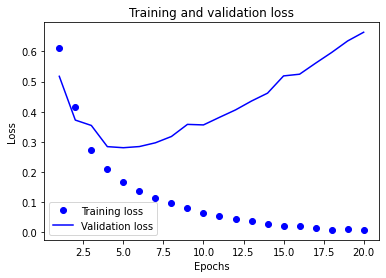

In [49]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['binary_accuracy']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show

In [46]:
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

#### Training and validation accuracy

<function matplotlib.pyplot.show(*args, **kw)>

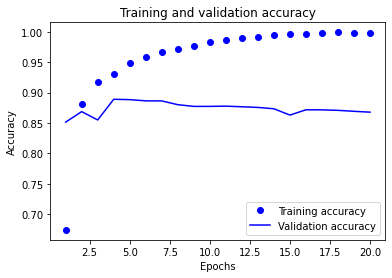

In [50]:
plt.clf()

acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show

Displayed above we have an example of **overfitting**. To prevent it, in this case could be sufficient to train the network for 4 epochs only

In [64]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(LIMIT_WORD,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(
    optimizer=optimizers.RMSprop(lr=0.001),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)
model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512
)
results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 1s 52us/sample - loss: 0.4445 - binary_accuracy: 0.8198
Epoch 2/4
25000/25000 [==============================] - 1s 36us/sample - loss: 0.2498 - binary_accuracy: 0.9104
Epoch 3/4
25000/25000 [==============================] - 1s 36us/sample - loss: 0.1956 - binary_accuracy: 0.9283
Epoch 4/4
25000/25000 [==============================] - 1s 39us/sample - loss: 0.2992 - binary_accuracy: 0.8828


In [65]:
print(results)

[0.2991836279296875, 0.88284]


In [66]:
model.predict(x_test)

array([[0.22048058],
       [0.99993706],
       [0.8645351 ],
       ...,
       [0.08931651],
       [0.11073526],
       [0.7006499 ]], dtype=float32)

With this fairly naive approach we obtained an accuracy of 88%.